# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data/'
import pandas as pd
import numpy as np
import glob
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
EBOLA_FOLDER = DATA_FOLDER + 'ebola/'

In [3]:
file_gui = glob.glob(EBOLA_FOLDER + "guinea_data/*.csv")
file_lib = glob.glob(EBOLA_FOLDER + "liberia_data/*.csv")
file_sie = glob.glob(EBOLA_FOLDER + "sl_data/*.csv")
list_gui = []
#Create DataFrame for Guinea
for file in file_gui:
    df = pd.read_csv(file,header=0,index_col=None,parse_dates=['Date'])
    list_gui.append(df)
ebola_gui = pd.concat(list_gui)

list_lib = []
#Create DataFrame for Liberia
for file in file_lib:
    df = pd.read_csv(file,header=0,index_col=None,parse_dates=['Date'])
    list_lib.append(df)
ebola_lib = pd.concat(list_lib)

list_sie = []
#Create DataFrame for Sierra Leone
for file in file_sie:
    df = pd.read_csv(file,header=0,index_col=None,parse_dates=['date'])
    list_sie.append(df)
ebola_sie = pd.concat(list_sie)

In [4]:
res = ebola_gui.where(ebola_gui['Description'] == 'New cases of confirmed')
df = res[pd.notnull(res['Description'])]
new_cases_confirmed = df[['Totals', 'Date']]
new_cases_confirmed = new_cases_confirmed.rename(columns = {'Totals': 'New cases'})

res = ebola_gui.where(ebola_gui['Description'] == 'New deaths registered')
df = res[pd.notnull(res['Description'])]
new_deaths_registered = df[['Totals', 'Date']]
new_deaths_registered = new_deaths_registered.rename(columns = {'Totals': 'New deaths'})
test = new_cases_confirmed.merge(new_deaths_registered, on='Date')
test['Country'] = 'Guinea'
test = test.rename(columns={'Date': 'Month'})
test['Month'] = test.Month.dt.strftime("%B")
test

,New cases,Month,New deaths,Country
0,10,August,5,Guinea
1,10,August,2,Guinea
2,9,August,5,Guinea
3,29,August,3,Guinea
4,14,September,5,Guinea
5,17,September,5,Guinea
6,11,September,4,Guinea
7,11,September,4,Guinea
8,7,September,7,Guinea
9,13,September,2,Guinea


In [5]:
res = ebola_lib.where(ebola_lib['Variable'] == 'New case/s (confirmed)')
df = res[pd.notnull(res['Variable'])]
new_cases_confirmed = df[['National', 'Date']]
new_cases_confirmed = new_cases_confirmed.rename(columns = {'National': 'New cases'})
new_cases_confirmed

,New cases,Date
25,1.0,2014-06-16
25,0.0,2014-06-17
25,5.0,2014-06-22
25,4.0,2014-06-24
25,2.0,2014-06-25
25,1.0,2014-06-28
25,2.0,2014-06-29
25,2.0,2014-07-01
25,0.0,2014-07-02
25,1.0,2014-07-03


In [6]:
res = ebola_lib.where(ebola_lib['Variable'] == 'New case/s (confirmed)')
df = res[pd.notnull(res['Variable'])]
new_cases_confirmed = df[['National', 'Date']]
new_cases_confirmed = new_cases_confirmed.rename(columns = {'National': 'New cases'})

res = ebola_lib.where(ebola_lib['Variable'] == 'Newly reported deaths')
df = res[pd.notnull(res['Variable'])]
new_deaths_registered = df[['National', 'Date']]
new_deaths_registered = new_deaths_registered.rename(columns = {'National': 'New deaths'})
test = new_cases_confirmed.merge(new_deaths_registered, on='Date')
test['Country'] = 'Liberia'
test = test.rename(columns={'Date': 'Month'})
test['Month'] = test.Month.dt.strftime("%B")
test

,New cases,Month,New deaths,Country
0,1.0,June,2.0,Liberia
1,0.0,June,0.0,Liberia
2,5.0,June,4.0,Liberia
3,4.0,June,4.0,Liberia
4,2.0,June,3.0,Liberia
5,1.0,June,1.0,Liberia
6,2.0,June,0.0,Liberia
7,2.0,July,5.0,Liberia
8,0.0,July,5.0,Liberia
9,1.0,July,4.0,Liberia


In [7]:
ebola_lib[list(['Date','Variable','National'])]

,Date,Variable,National
0,2014-06-16,Specimens collected,1.0
1,2014-06-16,Specimens pending for testing,0.0
2,2014-06-16,Total specimens tested,28.0
3,2014-06-16,Newly reported deaths,2.0
4,2014-06-16,Total death/s in confirmed cases,8.0
5,2014-06-16,Total death/s in probable cases,6.0
6,2014-06-16,Total death/s in suspected cases,2.0
7,2014-06-16,"Total death/s in confirmed, probable, suspecte...",16.0
8,2014-06-16,Case Fatality Rate (CFR) - Confirmed & Probabl...,NaN
9,2014-06-16,Newly reported contacts,41.0


In [8]:
# We are using 'etc_new_deaths' for computing the number of deaths per day because it's the only information we have.
# 'etc' means 'Ebola Treatment Center', so those seem to be the deaths happening in the treatment center.

res = ebola_sie.where(ebola_sie['variable'] == 'new_confirmed')
df = res[pd.notnull(res['variable'])]
new_cases_confirmed = df[['National', 'date']]
new_cases_confirmed = new_cases_confirmed.rename(columns = {'National': 'New cases'})
#mean = np.ceil(np.mean(list(map(int, new_cases_confirmed['New cases'].dropna().values))))
#new_cases_confirmed = new_cases_confirmed.fillna(mean)

res = ebola_sie.where(ebola_sie['variable'] == 'etc_new_deaths')
df = res[pd.notnull(res['variable'])]
new_deaths_registered = df[['National', 'date']]
new_deaths_registered = new_deaths_registered.rename(columns = {'National': 'New deaths'})
#mean = np.ceil(np.mean(list(map(int, new_deaths_registered['New deaths'].dropna().values))))
#new_deaths_registered = new_deaths_registered.fillna(mean)
total = new_cases_confirmed.merge(new_deaths_registered, on='date')
total['Country'] = 'Sierra Leone'
total = total.rename(columns={'date': 'Month'})
total['Month'] = total.Month.dt.strftime("%B")
total

,New cases,Month,New deaths,Country
0,11,August,NaN,Sierra Leone
1,15,August,NaN,Sierra Leone
2,13,August,NaN,Sierra Leone
3,10,August,NaN,Sierra Leone
4,18,August,NaN,Sierra Leone
5,2,August,NaN,Sierra Leone
6,5,August,NaN,Sierra Leone
7,9,August,NaN,Sierra Leone
8,4,August,NaN,Sierra Leone
9,9,August,NaN,Sierra Leone


In [9]:
ebola_sie[list(['date','variable','National'])]

,date,variable,National
0,2014-08-12,population,6348350
1,2014-08-12,new_noncase,4
2,2014-08-12,new_suspected,10
3,2014-08-12,new_probable,1
4,2014-08-12,new_confirmed,11
5,2014-08-12,cum_noncase,657
6,2014-08-12,cum_suspected,46
7,2014-08-12,cum_probable,37
8,2014-08-12,cum_confirmed,717
9,2014-08-12,death_suspected,5


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Solution

### Explanation

Here we have 9 spreedsheets containing microbiome data. This data can be seen as a single table containing 2 columns, the `NAME` and the `COUNT`. Thus, we simply read those files and concatenate them into a single dataframe representing our table with 2 columns.

Given that the file does not contain headers, we ignore the first row (which is not a header) and give a name to the columns with the `header=None` and `names=['NAME', 'COUNT']` parameters.

We also add a new `BARCODE` column to the dataframe, which is the name corresponding to the column name in the metadata file. We give it the same name in order to have normalized dataframes that can be merged on columns with the same name.

Finally, we read the metadata file into a dataframe that we merge with our initial dataframe, we replace NA values with the `unknown` value and place an index on `[BARCODE, NAME]` in order to have unique indexes

### Corresponding Code

In [10]:
MICROBIOME_FOLDER = DATA_FOLDER + 'microbiome/'
mid_files = glob.glob(MICROBIOME_FOLDER + "MID*.xls")

In [11]:
# Initial empty dataframe
mid = pd.DataFrame()
for idx, file in enumerate(mid_files, 1):
    file_name = 'MID' + str(idx)
    # We give appropriate names to colummns and replace NA values with "unknown"
    tmp_mid = pd.read_excel(MICROBIOME_FOLDER+file_name+'.xls', names=['NAME', 'COUNT'], header=None)
    # We add a column "BARCODE" corresponding to the name of the file being read
    tmp_mid['BARCODE'] = file_name
    # We concatenate the values to create a single dataframe
    mid = pd.concat([mid, tmp_mid])

# We read the metadata file and merge it to the MID dataframe where columns have the same name
metadata = pd.read_excel(MICROBIOME_FOLDER + 'metadata.xls')
# We create an unique index on BARCODE and TAXON and replace NA values by 'unknown'
final_df = pd.merge(mid, metadata).fillna('unknown').set_index(['BARCODE', 'NAME'])
final_df

COUNT  \
BARCODE NAME                                                        
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1   
        Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      4   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      1   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      2   
        Archaea "Euryarchaeota" Halobacteria Halobacter...      4   
        Archaea "Euryarchaeota" Methanococci Methanococ...      1   
        Archaea "Euryarchaeota" Methanopyri Methanopyra...     12   
        Archaea "Euryarchaeota" Thermoplasmata Thermopl...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...     53   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
        Bacteria "Actinobacteria" Actinobacteria Actino...      3   
        Bacteria "Actinobacteria" Actinobacteria Actino...      1   
        Bacteria "Actinobacteria" Actinobacteria Actino...     99   
        Bacteria "Actinobacteria" Actinobacteria Actino...     17   
        Bacteria "Actinobacteria" Actinobacteria Actino...      2   
...                                                           ...   
MID9    Bacteria "Proteobacteria" Gammaproteobacteria O...     10   
        Bacteria "Proteobacteria" Gammaproteobacteria O...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria O...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     12   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      4   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    805   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    862   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     12   
        Bacteria "Proteobacteria" Gammaproteobacteria P...   3534   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      4   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria T...     25   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      3   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      1   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      3   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      1   
        Bacteria "Synergistetes" Synergistia Synergista...      3   
        Bacteria "Tenericutes" Mollicutes Anaeroplasmat...      1   
        Bacteria "Tenericutes" Mollicutes Haloplasmatal...     11   
        Bacteria "Thermodesulfobacteria" Thermodesulfob...      1   
        Bacteria "Thermodesulfobacteria" Thermodesulfob...      1   
        Bacteria "Thermotogae" Thermotogae Thermotogale...

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [12]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [13]:
titanic = pd.read_excel('Data/titanic.xls')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


1) In the follow output we can see the different type of attributes with their unique values

In [14]:
for c in titanic.columns:
    print("%s is of type %s" % (c,titanic[c].dtype))
    print(titanic[c].unique())
    print("\n ------------------------------\n")

pclass is of type int64
[1 2 3]

 ------------------------------

survived is of type int64
[1 0]

 ------------------------------

name is of type object
['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ..., 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']

 ------------------------------

sex is of type object
['female' 'male']

 ------------------------------

age is of type float64
[ 29.       0.9167   2.      30.      25.      48.      63.      39.      53.
  71.      47.      18.      24.      26.      80.          nan  50.      32.
  36.      37.      42.      19.      35.      28.      45.      40.      58.
  22.      41.      44.      59.      60.      33.      17.      11.      14.
  49.      76.      46.      27.      64.      55.      70.      38.      51.
  31.       4.      54.      23.      43.      52.      16.      32.5     21.
  15.      65.      28.5     45.5     56.      13.      61.      34.  

From above output we can see that travel class, surviving, sex and embarked have some limited possibilities,
which make them good candidate for categorical type

In [15]:
#change travel class to categorical type with more significant label
titanic['pclass'] = titanic['pclass'].apply(lambda x: {1:'1st',2:'2nd',3:'3rd'}[x]).astype('category')
#change surviving attribute to categorical type
titanic['survived'] = titanic['survived'].astype('category')
#change sex attribute to categorical type
titanic['sex'] = titanic['sex'].astype('category')
#change embarked attribute to categorical type with more significant label
titanic['embarked'] = titanic['embarked'].apply(lambda x : {'C':'Cherbourg','Q':'Queenstown','S':'Southampton'}.get(x,'Unkown'))
titanic.pclass.dtype

category

2) Histogram plot for travel class, embarkation port, sex and age by decade

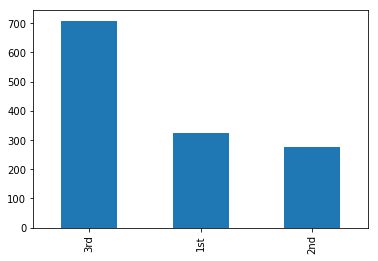

In [16]:
hist_pclass = titanic['pclass']
hist_pclass.value_counts().plot.bar()

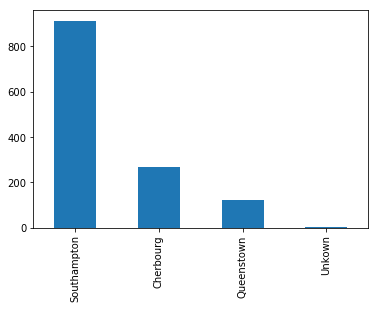

In [17]:
hist_emb = titanic['embarked'].value_counts().plot.bar()

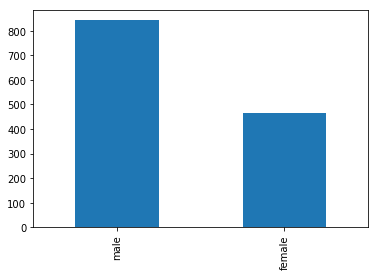

In [18]:
hist_sex = titanic['sex'].value_counts().plot.bar()

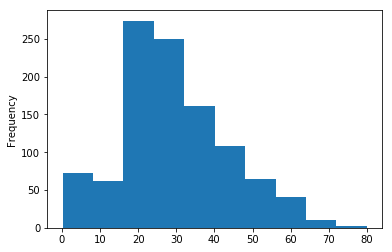

In [19]:
hist_age = titanic['age'].plot.hist(bins=10)

3) Proportion of passengers by cabin floor

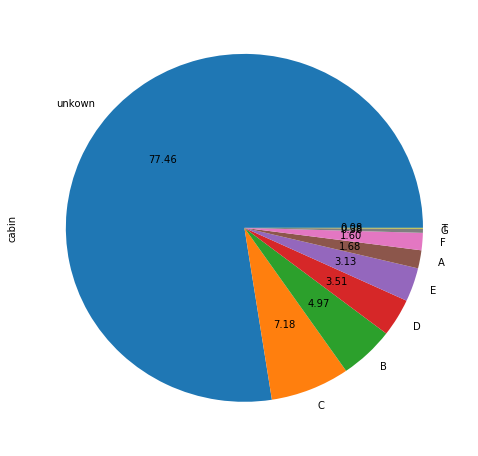

In [20]:
cabin_plot = titanic['cabin'].astype(str).apply(lambda x : x[0]).apply(lambda x : {'n':'unkown'}.get(x,x)).copy()
cabin_plot.value_counts().plot.pie(autopct='%.2f',figsize=(8, 8))

4) Proportion of the passengers that survived for each travel class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000157E7E59908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000157E688F5C0>], dtype=object)

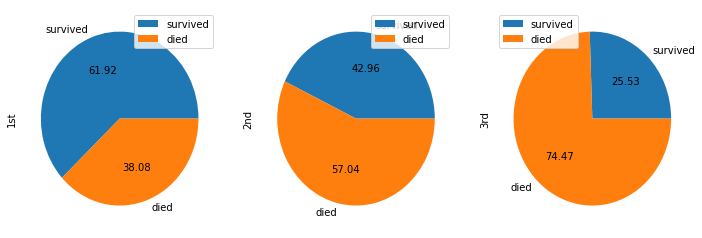

In [21]:
#filter needed columns
survived_data = titanic[['pclass','survived']].copy()
#created columns for people who died
survived_data['died'] = 1 - survived_data['survived'].astype('int')
#convert survived column to int type
survived_data['survived'] = survived_data['survived'].astype('int')
#group by travel class on a sum and transpose (for ploting to works)
survived_plot = survived_data.groupby('pclass').sum().transpose()
#subplot data on 3 pie charts
survived_plot.plot.pie(subplots=True,autopct='%.2f',figsize=(12, 4))

5) Proportion of the passengers that survived by travel class and sex

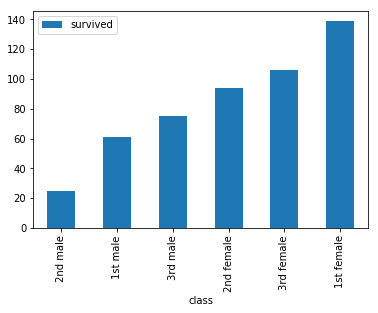

In [22]:
#filter needed columns
survived_sex_data = titanic[['pclass','sex','survived']].copy()
#creating new columns for each class of pair travel class and sex
survived_sex_data['class'] =  survived_sex_data['pclass'].astype(str) + " " + survived_sex_data['sex'].astype(str)
#filter out columns we don't need anymore
sur_sex_plot = survived_sex_data[['survived','class']].copy()
#convert survived categorical type to int
sur_sex_plot['survived'] = sur_sex_plot['survived'].astype('int')
#group by class of pairs and plot
sur_sex_plot.groupby('class').sum().sort_values(['survived']).plot.bar()

6) Survival proportions by age category, travel class and sex

In [23]:
#filter needed columns
prop_data = titanic[['pclass','survived','age','sex']].copy().sort_values(['age'])
prop_data
#compute median
median = np.ceil(len(prop_data['age'])/2)
median_val = prop_data['age'][median]
#create new age category
prop_data['age_cat'] = prop_data['age'].apply(lambda x : 'young' if x < median_val else 'old')
#create new class with age category, travel class and sex
prop_data['class'] = prop_data['age_cat'].astype(str) + " " + prop_data['pclass'].astype(str) + " " + prop_data['sex'].astype(str)
#filter out non needed columns
prop_df = prop_data[['survived','class']].copy()
#converting categorical type to int
prop_df['survived'] = prop_df['survived'].astype('int')
#group by new class
prop_df.groupby(['class']).sum().sort_values(['survived'],ascending=[False])

,survived
class,
old 1st female,89
young 2nd female,63
young 3rd female,61
young 1st female,50
young 3rd male,47
old 3rd female,45
old 1st male,41
old 2nd female,31
old 3rd male,28
